In [52]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime as dt  # optional


In [53]:
data= Nifty50 = yf.download('^NSEI', start='2018-12-15', end='2022-12-15',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [54]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-17,10853.200195,10900.349609,10844.849609,10888.349609,10888.349609,296900
2018-12-18,10850.900391,10915.400391,10819.099609,10908.700195,10908.700195,286100
2018-12-19,10930.549805,10985.150391,10928.000000,10967.299805,10967.299805,312100
2018-12-20,10885.200195,10962.549805,10880.049805,10951.700195,10951.700195,318900
2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500
...,...,...,...,...,...,...
2022-12-08,18570.849609,18625.000000,18536.949219,18609.349609,18609.349609,202800
2022-12-09,18662.400391,18664.699219,18410.099609,18496.599609,18496.599609,215800
2022-12-12,18402.150391,18521.550781,18345.699219,18497.150391,18497.150391,193900


In [71]:
data.describe()

count      985.000000
mean     13894.385889
std       2895.076790
min       7610.250000
25%      11385.349609
50%      13601.099609
75%      16818.099609
max      18812.500000
Name: Close, dtype: float64

In [55]:
st = dt.datetime(2018, 1, 1) # setting the date. Optional line.
en = dt.datetime(2022, 1, 1) # setting the date. Optional line.

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3541.5836612809135
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4307.7421639410495
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1664.2938567658807
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1549.993697416092
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1545.1121693236403
Iteration:      6,   Func. Count:     33,   Neg. LLF: 1545.1113878147669
Iteration:      7,   Func. Count:     37,   Neg. LLF: 1545.1113123218784
Iteration:      8,   Func. Count:     41,   Neg. LLF: 1545.1113117549062
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1545.1113117549062
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squa

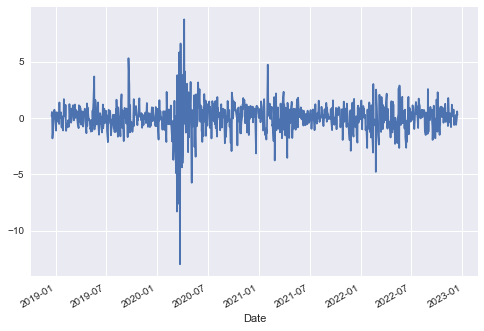

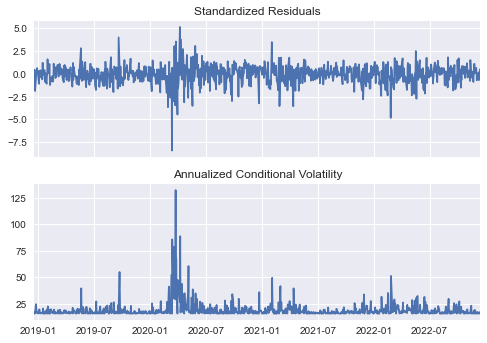

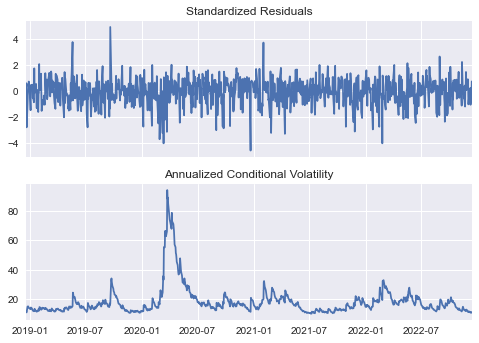

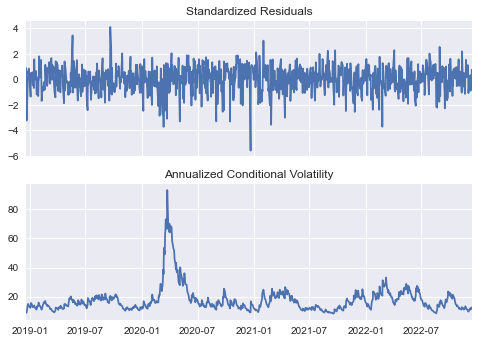

In [56]:
market = data["Adj Close"]

returns = 100 * market.pct_change().dropna() # generating return series
ax = returns.plot() # ploting the data

#xlim = ax.set_xlim(returns.index.min(), returns.index.max())

# Estimating a GARCH and ARCH models
from arch import arch_model

model1 = arch_model(returns, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())

model2 = arch_model(returns, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs

# Estimating TGARCH

model3= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs

In [57]:
model1 = arch_model(returns, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3541.5836612809135
Iteration:      2,   Func. Count:     12,   Neg. LLF: 4307.7421639410495
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1664.2938567658807
Iteration:      4,   Func. Count:     24,   Neg. LLF: 1549.993697416092
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1545.1121693236403
Iteration:      6,   Func. Count:     33,   Neg. LLF: 1545.1113878147669
Iteration:      7,   Func. Count:     37,   Neg. LLF: 1545.1113123218784
Iteration:      8,   Func. Count:     41,   Neg. LLF: 1545.1113117549062
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1545.1113117549062
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squa

In [58]:
model2 = arch_model(returns, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1130553158773.5776
Iteration:      2,   Func. Count:     14,   Neg. LLF: 835520577.8870652
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1867.3635621783474
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1441.7706104963006
Iteration:      5,   Func. Count:     36,   Neg. LLF: 2525.541321622947
Iteration:      6,   Func. Count:     42,   Neg. LLF: 1438.659309457416
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1438.659076904088
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1438.6590754271206
Iteration:      9,   Func. Count:     56,   Neg. LLF: 1438.6590754279212
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1438.6590754271206
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:          

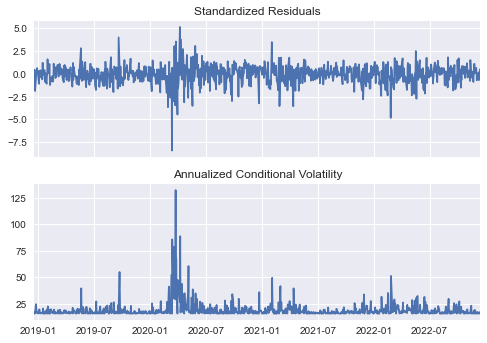

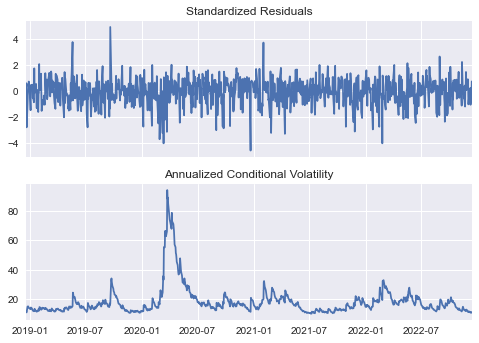

In [59]:
fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs

Iteration:      1,   Func. Count:      7,   Neg. LLF: 7731.62296589052
Iteration:      2,   Func. Count:     20,   Neg. LLF: 109208.21731293504
Iteration:      3,   Func. Count:     30,   Neg. LLF: 13965.442937705813
Iteration:      4,   Func. Count:     38,   Neg. LLF: 1414.9699201662022
Iteration:      5,   Func. Count:     45,   Neg. LLF: 5111.1354556322985
Iteration:      6,   Func. Count:     54,   Neg. LLF: 1410.5505839872985
Iteration:      7,   Func. Count:     60,   Neg. LLF: 1420.4825465753152
Iteration:      8,   Func. Count:     68,   Neg. LLF: 1485.7580295807445
Iteration:      9,   Func. Count:     75,   Neg. LLF: 1410.2867234450737
Iteration:     10,   Func. Count:     81,   Neg. LLF: 1410.2795735776963
Iteration:     11,   Func. Count:     87,   Neg. LLF: 1410.2785856962491
Iteration:     12,   Func. Count:     93,   Neg. LLF: 1410.2785719328613
Iteration:     13,   Func. Count:     98,   Neg. LLF: 1410.2785719354629
Optimization terminated successfully    (Exit mode 0)

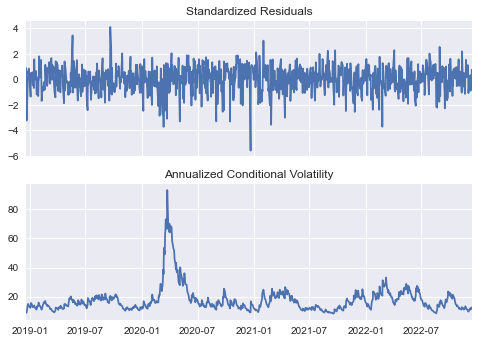

In [60]:
model3= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs

In [61]:
data = Nifty50.loc[:,"Close"].copy()

In [62]:
import pandas
import yfinance
import matplotlib.pyplot as matplt

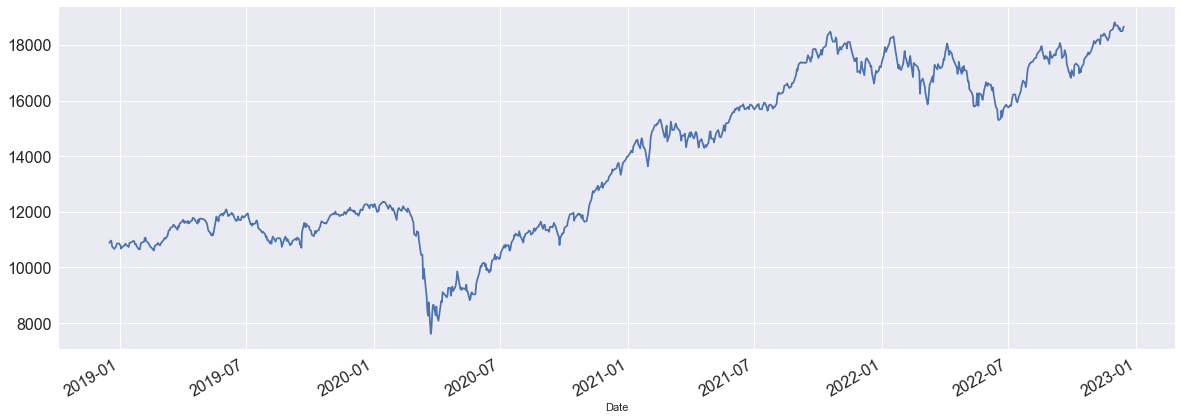

In [63]:
data.plot(figsize=(20,7), fontsize = 16)
matplt.style.use("seaborn")
matplt.show()